<a href="https://colab.research.google.com/github/Abinash0909/CodeClause_project/blob/main/Project_Flipkart_reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://colab.research.google.com/drive/1zJVhhN8_zgwjcX3GJF6b2W3_43pLnB_i



# **Flipkart reviews Sentiment Analysis using Python**

In [ ]:
# Project for Sentiment Analysis of Flipkart Reviews using python
# In this project we will take a dataset of the different reviews and ratings given by customers on flipkart on their products
# Using this dataset we will find about the various ratings and types of reviews and do a sentiment analysis
# using some tools in python sush as Pandas Matplotlib WordCloud ,etc.

In [ ]:
# Step 1 : Importing required python libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
data=pd.read_csv("/content/facebook_data.csv")
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,Awsome sound powerful bass battery backup is a...,5


In [ ]:
#Step 2: Checking for NULL values in the given dataset
#if null values found then they are to be purged

print(data.isnull().sum())

review    0
rating    0
dtype: int64


In [ ]:
#No NULL values found in the dataset so we can proceed further

In [ ]:
#  Step 3: PRE-PROCESSING OF DATASET:
#  a)Regular expression
#  b)Stemming process

In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer= nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Step 4: removing unwanted characters,punctuation marks and stopwords from the dataset.

In [ ]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?/]','',text)
    text=re.sub('http?://\S+|www.\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [ ]:
data['review']=data['review'].apply(clean)
data.head()

,review,rating
0,nice produt like design lot easi carri look...,5
1,awesom soundveri pretti see nd sound qualiti g...,5
2,awesom sound qualiti pros hrs batteri life in...,4
3,think good product per qualiti also design qui...,5
4,awsom sound power bass batteri backup also exc...,5


In [ ]:
#CLEAN dataset obtained : data free of punctuation marks,stopwords in english.

In [ ]:
# The rating column of the dataset contains the ratings given by every reviewer.
# Step 5: Pie Chart representaion of ratings of products from Flipkart :Pie plot constructed using Plotly

In [ ]:
ratings=data['rating'].value_counts()
numbers =ratings.index
quantity=ratings.values

import plotly.express as px

figure=px.pie(data,
             values=quantity,
             names=numbers,title='Ratings',hole=0.3)
figure.show()

In [ ]:
# Data presented in form of Pie Plot of the ratings that the customers have given to the products on flipkart

In [ ]:
# Step 6 : To see the kinds of reviews by customers of Flipkart with the help of WORDCLOUD

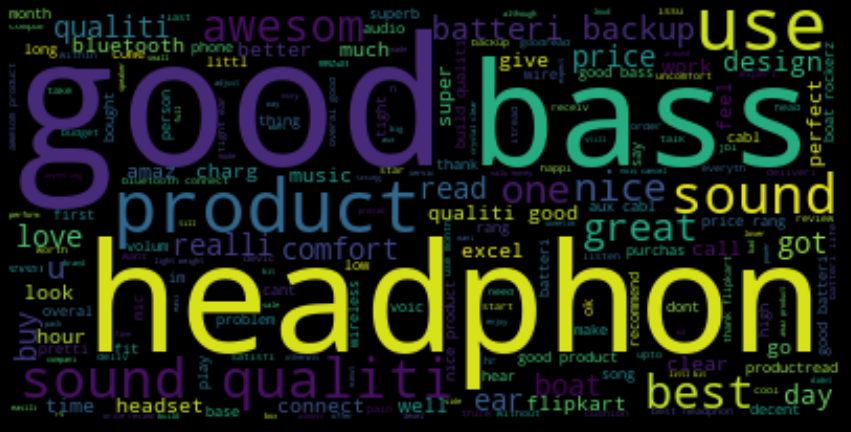

In [ ]:
text= " ".join(i for i in data.review)
stopwords=set(STOPWORDS)
wordcloud= WordCloud(stopwords=stopwords,
                    background_color="black").generate(text)
plt.figure(figsize=(15,10),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Just experimented giving the Word Cloud a Shape using the mask property of wordcloud

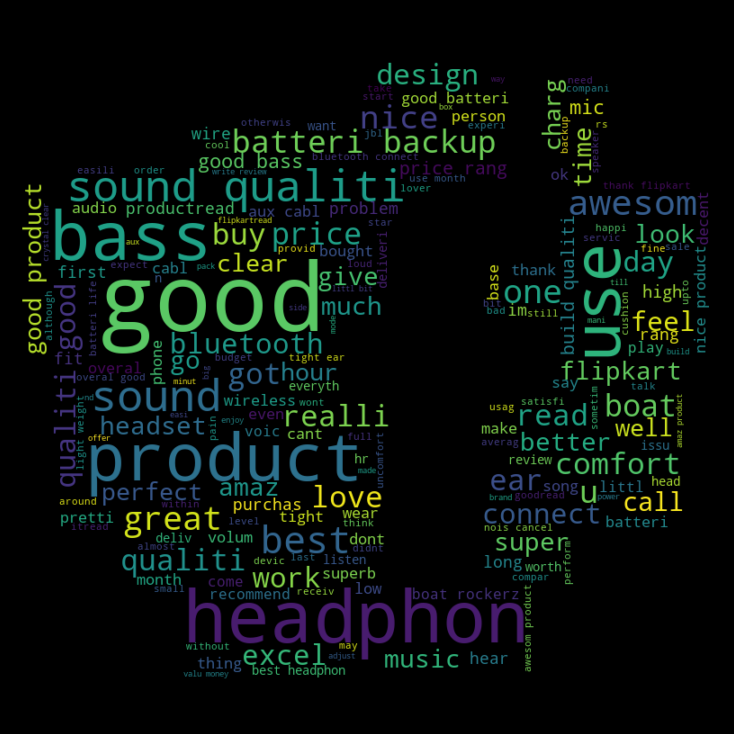

In [ ]:
import numpy as np
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image
text= " ".join(i for i in data.review)
mask = np.array(Image.open('/content/f.png'))
stopwords=set(STOPWORDS)
wordcloud= WordCloud(stopwords=stopwords,mask=mask,width=1600,height=800,background_color="black").generate(''.join(text))
plt.figure(figsize=(30,10),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout (pad=0)
plt.show()

In [ ]:
# Step 7 : Sentiment Score
# To Analyse the sentiments of flipkart reviews by adding three columns in the dataset
# =>Positive,Negative and Neutral

In [ ]:
nltk.download('vader_lexicon')
sentiments= SentimentIntensityAnalyzer()
#creating the variables
data["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in data['review']]
data["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in data['review']]
data["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data['review']]

data=data[['review','Positive','Negative','Neutral']]
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,review,Positive,Negative,Neutral
0,nice produt like design lot easi carri look...,0.431,0.000,0.569
1,awesom soundveri pretti see nd sound qualiti g...,0.471,0.000,0.529
2,awesom sound qualiti pros hrs batteri life in...,0.194,0.000,0.806
3,think good product per qualiti also design qui...,0.393,0.049,0.558
4,awsom sound power bass batteri backup also exc...,0.479,0.029,0.492


In [ ]:
# Score table created (where,values(Positive+Negative+Neutral)=1)

In [ ]:
# Feedback of produts and servies by Flipkart

In [ ]:
# Step 8 : Creating 3 variables which will give sum of all the variables created so far

In [ ]:
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

# Defing  a function to get the majority score obatined in the sentiment analysis

def sentiment_score(a,b,c):
    print("The majority of the reviews are :")
    if(a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")

sentiment_score(x,y,z)

The majority of the reviews are :
Neutral


In [ ]:
# Hence we can conclude that most of the customers have given neutral reviews

In [ ]:
# Now we can see the total number and percentage of Positive Negative and Neutral sentiment scores
# to finalize the conclusion about the flipkart reviews

In [ ]:
# Step 9 : Creating a Pie Plot for the Types of reviews given by the customers of Flipkart (Positive,Negative,Neutral)

In [ ]:
print("Positive :",x)
print("Negative :",y)
print("Neutral  :",z)
print("\nPercentage Analysis:")
print("Percentage of Customers with Positive Reviews % :",x/(x+y+z)*100)
print("Percentage of Customers with Negative Reviews % :",y/(x+y+z)*100)
print("Percentage of Customers with Neutral  Reviews %  :",z/(x+y+z)*100)
print("Percentage of Customers with Non-negative Reviews % :",(x+z)/(x+y+z)*100)

Positive : 179.51100000000017
Negative : 17.466999999999995
Neutral  : 292.02299999999985

Percentage Analysis:
Percentage of Customers with Positive Reviews % : 36.70974087987553
Percentage of Customers with Negative Reviews % : 3.571976335426716
Percentage of Customers with Neutral  Reviews %  : 59.71828278469775
Percentage of Customers with Non-negative Reviews % : 96.42802366457329


In [ ]:
import plotly.express as px

precentage = [x,y,z]
names = ['Positive','Negative','Neutral']

fig = px.pie(values=precentage, names=names,title='Type of Reviews(Positive,Negative,Neutral)',hole=0.3)
fig.show()

In [ ]:
# From the Pie Plot above we can see that most of the customers have given neutral reviews

In [ ]:
precentage = [x+z,y]
names = ['Non-negative','Negative']

fig = px.pie(values=precentage, names=names,title='Type of Reviews(Negative,Non-Negative)',hole=0.1)
fig.show()

In [ ]:
# We can see that more than 50% of the reviews are non-Negative(96.4 %) reviews ,i.e;they are either Positive(36.7%) or Neutral(59.71%)
# Overall we can conclude that customers are satisfied with the services of Flipkart.


The code begins by importing necessary libraries such as pandas, seaborn, matplotlib, NLTK, and wordcloud. It then reads a CSV file named "facebook_data.csv" into a pandas DataFrame and performs some initial data exploration by displaying the first few rows and checking for any missing values.

Next, the code defines a function called clean() for text preprocessing, which includes converting text to lowercase, removing URLs, HTML tags, punctuation, and stopwords, and performing stemming.

The code then visualizes the distribution of ratings using a pie chart created with Plotly Express. It also generates a word cloud based on the text in the "review" column, using the WordCloud library.

Following that, the code downloads the VADER lexicon for sentiment analysis and initializes a SentimentIntensityAnalyzer object. Sentiment analysis is performed on the reviews in the DataFrame, and the resulting positive, negative, and neutral sentiment scores are added as new columns to the DataFrame.

The code calculates the sum of positive, negative, and neutral sentiment scores and defines a function called sentiment_score() to determine the majority sentiment based on these sums.

Finally, the code displays the majority sentiment, as well as the total counts and percentages of positive, negative, and neutral reviews. It also provides the percentage of customers with non-negative reviews (combining positive and neutral sentiments).

In summary, the code reads a CSV file containing Facebook data, performs data exploration and visualization, conducts sentiment analysis using the VADER algorithm, and presents the sentiment distribution and statistics for the reviews in the dataset.